# Blockchain Data Extraction & Analysis
This notebook fetches blockchain data using HyperSync, saves it in Parquet format, and analyzes the data.

In [2]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd

# Get the current working directory
print("Current working directory:", os.getcwd())

# Get the project root directory (going up one level from notebook directory)
project_root = os.path.dirname(os.getcwd())
data_dir = os.path.join(project_root, "data")

print("\nProject root:", project_root)
print("Data directory:", data_dir)

# List all files in the data directory using absolute path
print("\nFiles in data directory:")
try:
    print(os.listdir(data_dir))
    
    # Read JSON file
    json_file = os.path.join(data_dir, "transactions.json")
    parquet_file = os.path.join(data_dir, "transactions.parquet")
    df_json = pd.read_json(json_file)
    print(f"\nSuccessfully read {json_file}")
    print("JSON data shape:", df_json.shape)
    
    df = pd.read_parquet(parquet_file)

    # Display first few rows
    print(df.head())
    
except Exception as e:
    print(f"Error reading files: {str(e)}")

Current working directory: /Users/dipanjanmondal/projects/base-model-test/notebook

Project root: /Users/dipanjanmondal/projects/base-model-test
Data directory: /Users/dipanjanmondal/projects/base-model-test/data

Files in data directory:
['blocks.parquet', 'transactions.parquet', 'transactions.json', 'transactions.csv']

Successfully read /Users/dipanjanmondal/projects/base-model-test/data/transactions.json
JSON data shape: (4, 18)
                                          block_hash  block_number  \
0  0xecc3f9be114f21f4580678117dc98def74a75fef1260...      26459470   
1  0xecc3f9be114f21f4580678117dc98def74a75fef1260...      26459470   
2  0xecc3f9be114f21f4580678117dc98def74a75fef1260...      26459470   
3  0xecc3f9be114f21f4580678117dc98def74a75fef1260...      26459470   
4  0xecc3f9be114f21f4580678117dc98def74a75fef1260...      26459470   

                                         from       gas   gas_price  \
0  0xdeaddeaddeaddeaddeaddeaddeaddeaddead0001  0x0f4240        0x00   


In [3]:
# List of columns that are in hex format
hex_columns = [
    "gas", "gas_price", "max_priority_fee_per_gas", "max_fee_per_gas",
    "cumulative_gas_used", "effective_gas_price", "gas_used", "nonce"
]

# Convert hex to integer (ignoring null values)
for col in hex_columns:
    df[col] = df[col].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith("0x") else x)

# Convert transaction_index & block_number to integers if they aren't already
df["transaction_index"] = df["transaction_index"].astype(int)
df["block_number"] = df["block_number"].astype(int)

# Re-check data types
print(df.dtypes)


block_hash                   object
block_number                  int64
from                         object
gas                           int64
gas_price                     int64
hash                         object
input                        object
nonce                         int64
to                           object
transaction_index             int64
value                        object
max_priority_fee_per_gas    float64
max_fee_per_gas             float64
chain_id                     object
cumulative_gas_used           int64
effective_gas_price           int64
gas_used                      int64
status                        uint8
dtype: object


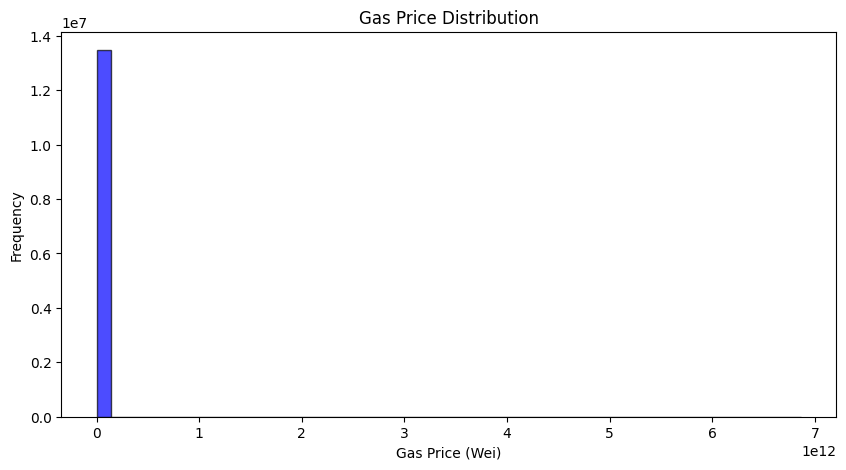

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["gas_price"], bins=50, alpha=0.7, color="blue", edgecolor="black")
plt.xlabel("Gas Price (Wei)")
plt.ylabel("Frequency")
plt.title("Gas Price Distribution")
plt.show()

# Histogram of Gas Prices


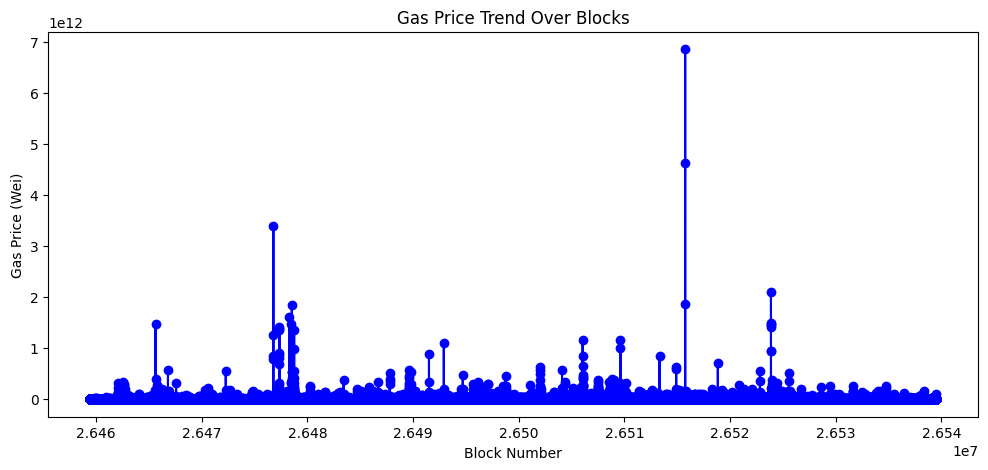

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(df["block_number"], df["gas_price"], marker="o", linestyle="-", color="blue")
plt.xlabel("Block Number")
plt.ylabel("Gas Price (Wei)")
plt.title("Gas Price Trend Over Blocks")
plt.show()


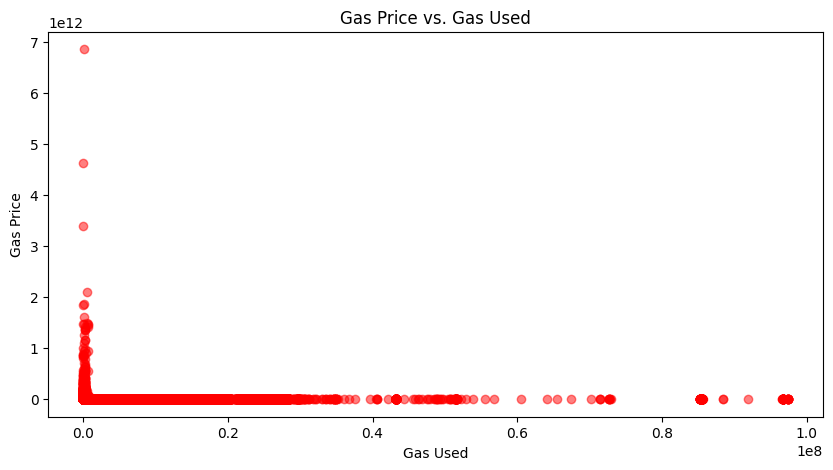

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(df["gas_used"], df["gas_price"], alpha=0.5, color="red")
plt.xlabel("Gas Used")
plt.ylabel("Gas Price")
plt.title("Gas Price vs. Gas Used")
plt.show()


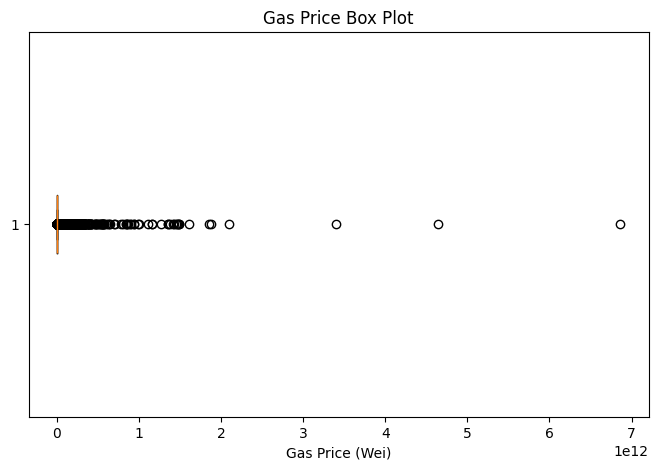

In [7]:
plt.figure(figsize=(8, 5))
plt.boxplot(df["gas_price"], vert=False)
plt.xlabel("Gas Price (Wei)")
plt.title("Gas Price Box Plot")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load and Inspect the Data
def load_and_preprocess_data():
    df = pd.read_parquet("../data/transactions.parquet")
    
    # Print data info
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    return df

# 2. Handle Missing Values (as per GAS_PRICE_PREDICTION.md)
def handle_missing_values(df):
    df['max_priority_fee_per_gas'] = df['max_priority_fee_per_gas'].fillna(0)
    df['max_fee_per_gas'] = df['max_fee_per_gas'].fillna(0)
    df['effective_gas_price'] = df['effective_gas_price'].fillna(df['gas_price'])
    return df

# 3. Data Visualization for Gas Price Prediction
def visualize_gas_metrics(df):
    # 1. Gas Price Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df['gas_price'], bins=50, alpha=0.7)
    plt.title('Gas Price Distribution')
    plt.xlabel('Gas Price (Wei)')
    plt.ylabel('Frequency')
    plt.yscale('log')  # Log scale for better visualization
    plt.show()

    # 2. Gas Price by Block Number (Time Series)
    plt.figure(figsize=(12, 6))
    df.groupby('block_number')['gas_price'].mean().plot()
    plt.title('Average Gas Price per Block')
    plt.xlabel('Block Number')
    plt.ylabel('Average Gas Price (Wei)')
    plt.show()

    # 3. Block Congestion Analysis
    plt.figure(figsize=(12, 6))
    plt.scatter(df['cumulative_gas_used'], df['gas_price'], alpha=0.5, s=5)
    plt.title('Block Congestion vs Gas Price')
    plt.xlabel('Cumulative Gas Used')
    plt.ylabel('Gas Price (Wei)')
    plt.show()

    # 4. Gas Usage Patterns
    plt.figure(figsize=(12, 6))
    plt.scatter(df['gas_used'], df['gas_price'], alpha=0.5, s=5)
    plt.title('Gas Used vs Gas Price')
    plt.xlabel('Gas Used')
    plt.ylabel('Gas Price (Wei)')
    plt.show()

# 4. Feature Engineering for Gas Price Prediction
def engineer_features(df):
    # Block-based Features
    df['gas_price_last_5_avg'] = df.groupby('block_number')['gas_price'].transform(
        lambda x: x.rolling(window=5, min_periods=1).mean()
    )
    
    # Gas Usage Features
    df['gas_utilization_ratio'] = df['gas_used'] / df['gas']
    df['block_congestion'] = df['cumulative_gas_used'] / df['gas'].max()
    
    # Priority Fee Features
    df['priority_fee_ratio'] = df['max_priority_fee_per_gas'] / (df['gas_price'] + 1e-10)
    df['fee_premium'] = df['gas_price'] - df['effective_gas_price']
    
    return df

# Main analysis
df = load_and_preprocess_data()
df = handle_missing_values(df)
visualize_gas_metrics(df)
df = engineer_features(df)

# Display summary statistics for gas price prediction
print("\nSummary Statistics for Gas Price Prediction:")
prediction_features = [
    'gas_price', 'gas_used', 'gas_utilization_ratio',
    'block_congestion', 'priority_fee_ratio', 'fee_premium'
]
print(df[prediction_features].describe())

# Display correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[prediction_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations for Gas Price Prediction')
plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471618 entries, 0 to 13471617
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   block_hash                object
 1   block_number              uint64
 2   from                      object
 3   gas                       object
 4   gas_price                 object
 5   hash                      object
 6   input                     object
 7   nonce                     object
 8   to                        object
 9   transaction_index         uint64
 10  value                     object
 11  max_priority_fee_per_gas  object
 12  max_fee_per_gas           object
 13  chain_id                  object
 14  cumulative_gas_used       object
 15  effective_gas_price       object
 16  gas_used                  object
 17  status                    uint8 
dtypes: object(15), uint64(2), uint8(1)
memory usage: 1.7+ GB
None

Missing Values:
block_hash                 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1036e17f0>>
Traceback (most recent call last):
  File "/Users/dipanjanmondal/projects/base-model-test/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
